In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [2]:
df = pd.read_csv('epa-sea-level.csv')

In [3]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


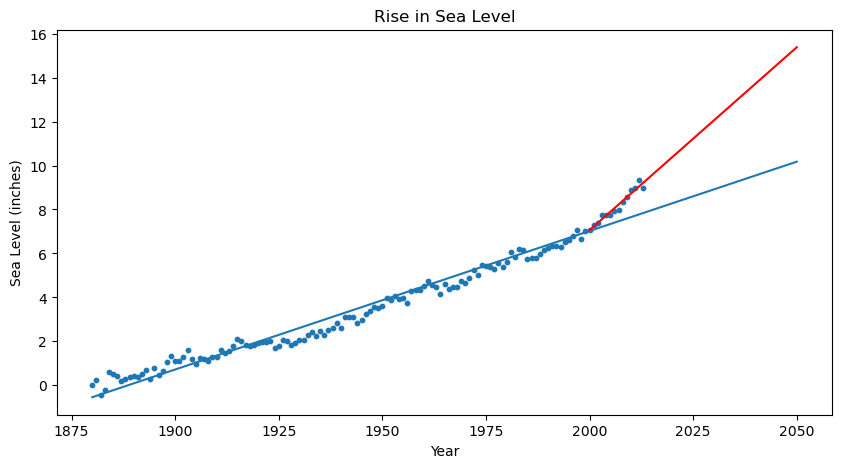

In [4]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.scatter(x,y, s = 10)

reg = linregress(x,y)
future_years = np.array(range(2014, 2051, 1))

x1 = np.concatenate((x.to_numpy(), future_years))
y1 = reg.slope * x1 + reg.intercept
ax.plot(x1, y1)

ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')


array = np.array(range(2000, 2014, 1))
new_df = df[df['Year'].isin(array)]
new_x =new_df['Year']
new_y = new_df['CSIRO Adjusted Sea Level']
new_reg = linregress(new_x,new_y)
x2 = np.concatenate((new_x.to_numpy(),future_years))
y2 = new_reg.slope * x2 + new_reg.intercept
ax.plot(x2, y2, color = 'red')

plt.show()